In [3]:
import pandas as pd
import statsmodels.api as sm
from google.colab import drive
from google.colab import files

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

For a guide to running Google Colab on your local machine see https://research.google.com/colaboratory/local-runtimes.html

## Read Dataset

In [6]:
# Dataset from https://www.kaggle.com/datasets/shashanknecrothapa/ames-housing-dataset/data

data = pd.read_csv('https://raw.githubusercontent.com/fadlia12345/DataMiningCourse/refs/heads/main/real_estate_market_data.csv')

data

,MS_SubClass,MS_Zoning,Lot_Frontage,Lot_Area,Street,Alley,Lot_Shape,Land_Contour,Utilities,Lot_Config,...,Fence,Misc_Feature,Misc_Val,Mo_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price,Longitude,Latitude
0,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,141,31770,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,5,2010,WD,Normal,215000,-93.619754,42.054035
1,One_Story_1946_and_Newer_All_Styles,Residential_High_Density,80,11622,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2010,WD,Normal,105000,-93.619756,42.053014
2,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,81,14267,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Corner,...,No_Fence,Gar2,12500,6,2010,WD,Normal,172000,-93.619387,42.052659
3,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,93,11160,Pave,No_Alley_Access,Regular,Lvl,AllPub,Corner,...,No_Fence,NaN,0,4,2010,WD,Normal,244000,-93.617320,42.051245
4,Two_Story_1946_and_Newer,Residential_Low_Density,74,13830,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,Inside,...,Minimum_Privacy,NaN,0,3,2010,WD,Normal,189900,-93.638933,42.060899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,Split_or_Multilevel,Residential_Low_Density,37,7937,Pave,No_Alley_Access,Slightly_Irregular,Lvl,AllPub,CulDSac,...,Good_Privacy,NaN,0,3,2006,WD,Normal,142500,-93.604776,41.988964
2825,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,0,8885,Pave,No_Alley_Access,Slightly_Irregular,Low,AllPub,Inside,...,Minimum_Privacy,NaN,0,6,2006,WD,Normal,131000,-93.602680,41.988314
2826,Split_Foyer,Residential_Low_Density,62,10441,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,Minimum_Privacy,Shed,700,7,2006,WD,Normal,132000,-93.606847,41.986510
2827,One_Story_1946_and_Newer_All_Styles,Residential_Low_Density,77,10010,Pave,No_Alley_Access,Regular,Lvl,AllPub,Inside,...,No_Fence,NaN,0,4,2006,WD,Normal,170000,-93.600190,41.990921


## Explore Data

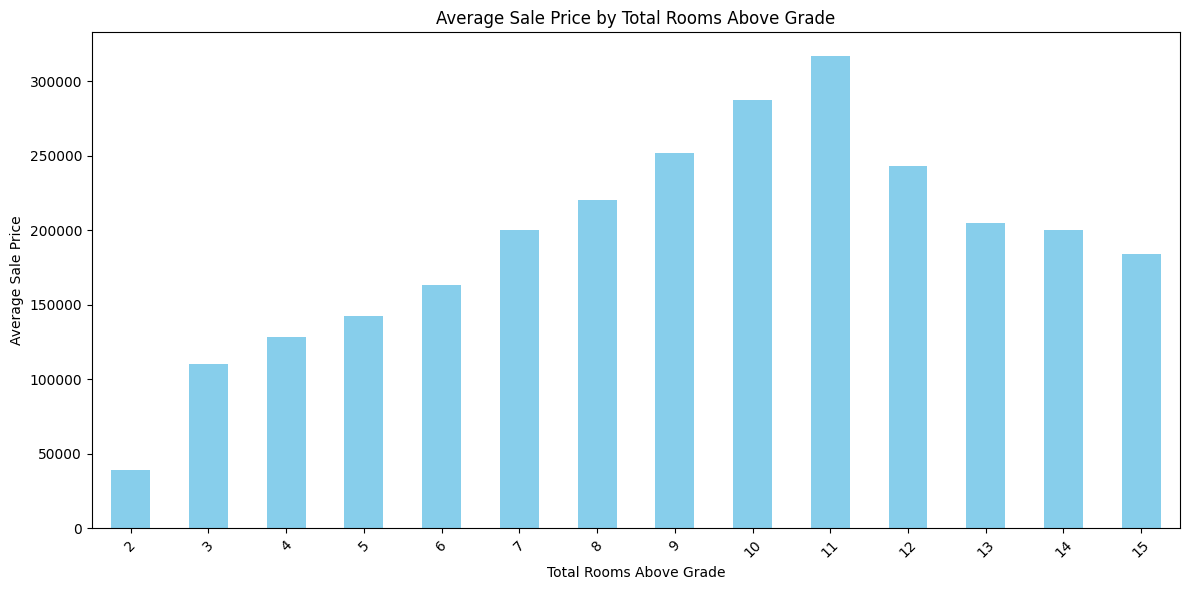

In [7]:
# Calculate the average sale price by TotRms_AbvGrd
avg_price_by_rooms = data.groupby('TotRms_AbvGrd')['Sale_Price'].mean().sort_index()

# Plot the bar graph
plt.figure(figsize=(12, 6))
avg_price_by_rooms.plot(kind='bar', color='skyblue')
plt.title('Average Sale Price by Total Rooms Above Grade')
plt.xlabel('Total Rooms Above Grade')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

In [8]:
data['Bldg_Type'].unique()
data['Neighborhood'].unique()

array(['North_Ames', 'Gilbert', 'Stone_Brook', 'Northwest_Ames',
       'Somerset', 'Briardale', 'Northpark_Villa', 'Northridge_Heights',
       'Bloomington_Heights', 'Northridge', 'Sawyer_West', 'Sawyer',
       'Greens', 'Brookside', 'Old_Town', 'Iowa_DOT_and_Rail_Road',
       'Clear_Creek', 'South_and_West_of_Iowa_State_University',
       'Edwards', 'College_Creek', 'Crawford', 'Veenker', 'Blueste',
       'Mitchell', 'Timberland', 'Meadow_Village', 'Green_Hills',
       'Landmark'], dtype=object)

## Run Linear Regression

In [9]:
  # Specify features and target variable
# features = all columns except Sale_Price
features = data.drop(columns=['Sale_Price'])

X = pd.get_dummies(data.drop(columns=['Sale_Price']), drop_first=True, dtype=int) # use all available columns

# y = np.log(data['Sale_Price'])
y = data['Sale_Price']

X

,Lot_Frontage,Lot_Area,Year_Built,Year_Remod_Add,Mas_Vnr_Area,BsmtFin_SF_1,BsmtFin_SF_2,Bsmt_Unf_SF,Total_Bsmt_SF,First_Flr_SF,...,Sale_Type_ConLw,Sale_Type_New,Sale_Type_Oth,Sale_Type_VWD,Sale_Type_WD,Sale_Condition_AdjLand,Sale_Condition_Alloca,Sale_Condition_Family,Sale_Condition_Normal,Sale_Condition_Partial
0,141,31770,1960,1960,112,2,0,441,1080,1656,...,0,0,0,0,1,0,0,0,1,0
1,80,11622,1961,1961,0,6,144,270,882,896,...,0,0,0,0,1,0,0,0,1,0
2,81,14267,1958,1958,108,1,0,406,1329,1329,...,0,0,0,0,1,0,0,0,1,0
3,93,11160,1968,1968,0,1,0,1045,2110,2110,...,0,0,0,0,1,0,0,0,1,0
4,74,13830,1997,1998,0,3,0,137,928,928,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2824,37,7937,1984,1984,0,3,0,184,1003,1003,...,0,0,0,0,1,0,0,0,1,0
2825,0,8885,1983,1983,0,2,324,239,864,902,...,0,0,0,0,1,0,0,0,1,0
2826,62,10441,1992,1992,0,3,0,575,912,970,...,0,0,0,0,1,0,0,0,1,0
2827,77,10010,1974,1975,0,1,123,195,1389,1389,...,0,0,0,0,1,0,0,0,1,0


In [10]:
# Add a constant to the features (intercept term)
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Sale_Price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     103.9
Date:                Sun, 29 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:17:26   Log-Likelihood:                -32452.
No. Observations:                2829   AIC:                         6.544e+04
Df Residuals:                    2560   BIC:                         6.704e+04
Df Model:                         268                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [11]:
# Print coefficients formatted manually without scientific notation
coef_df = pd.DataFrame({
    'Coef': model.params,
    'Std Err': model.bse,
    't': model.tvalues,
    'P>|t|': model.pvalues,
    '[0.025': model.conf_int()[0],
    '0.975]': model.conf_int()[1]
})

# Print the DataFrame without scientific notation
print(coef_df.to_string(float_format='{:,.4f}'.format))

                                                                  Coef         Std Err        t  P>|t|           [0.025          0.975]
const                                                 -25,500,550.7332 10,705,376.4197  -2.3820 0.0173 -46,492,627.9036 -4,508,473.5628
Lot_Frontage                                                   13.6880         17.5341   0.7806 0.4351         -20.6946         48.0705
Lot_Area                                                        0.3983          0.0910   4.3756 0.0000           0.2198          0.5767
Year_Built                                                    454.4715         59.3081   7.6629 0.0000         338.1749        570.7682
Year_Remod_Add                                                114.0980         39.8827   2.8608 0.0043          35.8924        192.3036
Mas_Vnr_Area                                                   30.2613          4.2977   7.0413 0.0000          21.8340         38.6886
BsmtFin_SF_1                                    

## Run Single Decision Tree

In [12]:
# Specify features and target variable
features = data.drop(columns=['Sale_Price'])

X = pd.get_dummies(data.drop(columns=['Sale_Price']), drop_first=True) # use all available columns
y = data['Sale_Price']

# Fit a decision tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X, y)

# Make predictions
tree_predictions = tree_model.predict(X)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y, tree_predictions))
mae = mean_absolute_error(y, tree_predictions)
mape = np.mean(np.abs((y - tree_predictions) / y)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y, tree_predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

RMSE: 0.0000
MAE: 0.0000
MAPE: 0.0000%
R-squared: 1.0000


## Run Random Forest

In [13]:
# Specify features and target variable
features = data.drop(columns=['Sale_Price'])

X = pd.get_dummies(data.drop(columns=['Sale_Price']), drop_first=True)  # Handle categorical variables with one-hot encoding
y = data['Sale_Price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a random forest model
# https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.RandomForestRegressor.html

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
# rf_model = DecisionTreeRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_train)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_train, rf_predictions))
mae = mean_absolute_error(y_train, rf_predictions)
mape = np.mean(np.abs((y_train - rf_predictions) / y_train)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y_train, rf_predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

RMSE: 10773.6226
MAE: 6441.7449
MAPE: 3.9091%
R-squared: 0.9814


## Feature Importance for Random Forest

                Feature  Importance
20          Garage_Cars    0.324469
11          Gr_Liv_Area    0.163582
2            Year_Built    0.157198
8         Total_Bsmt_SF    0.059726
9          First_Flr_SF    0.048842
3        Year_Remod_Add    0.027828
10        Second_Flr_SF    0.023133
1              Lot_Area    0.022797
21          Garage_Area    0.018250
19           Fireplaces    0.015393
4          Mas_Vnr_Area    0.015205
32             Latitude    0.011872
7           Bsmt_Unf_SF    0.008110
31            Longitude    0.007865
23        Open_Porch_SF    0.004886
0          Lot_Frontage    0.004572
197  BsmtFin_Type_1_GLQ    0.004217
217       Central_Air_Y    0.004196
22         Wood_Deck_SF    0.003791
16        Bedroom_AbvGr    0.003223


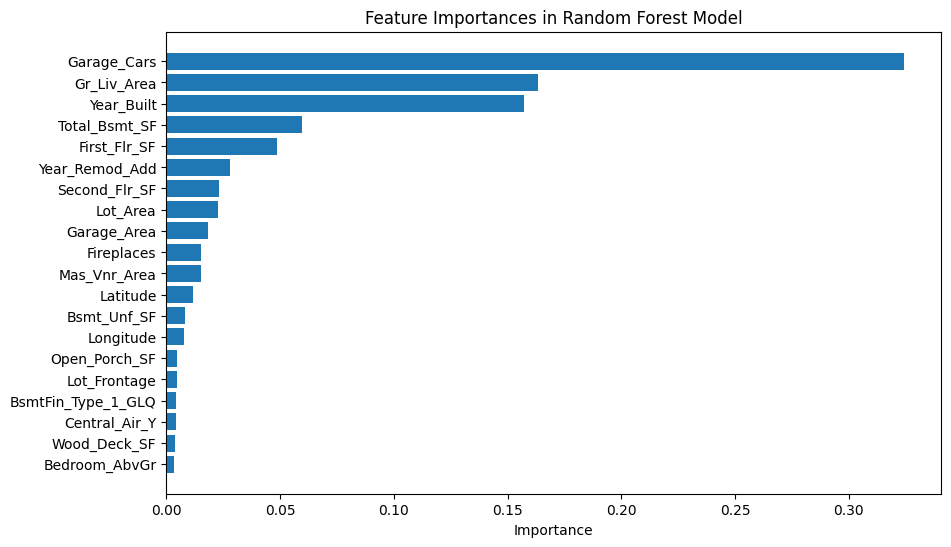

In [14]:
# Print feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df = importances_df.head(20)

# Display the feature importances
print(importances_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest Model')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

## Tuning Parameters for Random Forest

In [15]:
# Specify the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [None, 'sqrt', 'log2'],
    # 'bootstrap': [True, False]
}

# Instantiate the model
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    scoring='r2',  # Metric to optimize
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best R-squared score: ", grid_search.best_score_)

# Use the best estimator for predictions
best_rf_model = grid_search.best_estimator_
rf_predictions = best_rf_model.predict(X_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:  {'max_depth': None, 'n_estimators': 300}
Best R-squared score:  0.8583120438690501



Example Output from Above
```
Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best R-squared score:  0.7997852240892972


Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best R-squared score:  0.8696042325230664

Time: 2:28 running locally
Time: 6:48 running on cloud
```



# Run XG Boost

In [16]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np


In [17]:
# Specify features and target variable
X = pd.get_dummies(data.drop(columns=['Sale_Price']), drop_first=True)  # Handle categorical variables with one-hot encoding
y = data['Sale_Price']

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Instantiate the XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)

In [21]:
# Fit the model
xgb_model.fit(X_train, y_train)
# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

In [22]:
# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
mae = mean_absolute_error(y_test, xgb_predictions)
mape = np.mean(np.abs((y_test - xgb_predictions) / y_test)) * 100  # Mean Absolute Percentage Error
r2 = r2_score(y_test, xgb_predictions)

# Print the evaluation metrics
print(f'RMSE: {rmse:.4f}')
print(f'MAE: {mae:.4f}')
print(f'MAPE: {mape:.4f}%')
print(f'R-squared: {r2:.4f}')

RMSE: 28112.9789
MAE: 16827.4961
MAPE: 9.8648%
R-squared: 0.8835
